# Timeseries (Line)

In [1]:
# --- Packages ---
## General Packages
import pandas as pd
import xarray as xr
import numpy as np
import os
import ipynbname

## GeoCAT
import geocat.comp as gccomp
import geocat.viz as gv
import geocat.viz.util as gvutil

## Visualization
import cmaps  
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import shapely.geometry as sgeom

## MatPlotLib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.dates as mdates

from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.ticker import MultipleLocator


In [2]:
def get_filename():
    try:
        # Will fail when __file__ is undefined (e.g., in notebooks)
        filename = os.path.splitext(os.path.basename(__file__))[0]
    except NameError:
        try:
            # Will fail during non-interactive builds
            import ipynbname
            nb_path = ipynbname.path()
            filename = os.path.splitext(os.path.basename(str(nb_path)))[0]
        except Exception:
            # Fallback during Jupyter Book builds or other headless execution
            filename = "template_timeseries_line"
    return filename

fnFIG = get_filename() + ".png"
print(f"Figure filename: {fnFIG}")

Figure filename: template_timeseries_line-v01.png


In [3]:
# READ CSV file
ystr = 1950
yend = 2024

# File path
file_path = "../data/nino34_ersst5.csv"

# Read CSV
df = pd.read_csv(
    file_path,
    skiprows=1,                     # Skip the header row with long description
    names=["Date", "Nino34"],       # Assign custom column names
    parse_dates=["Date"],           # Parse the 'Date' column as datetime
    na_values=-9999.000             # Treat -9999.000 as missing
)

df.set_index("Date", inplace=True)
dat = df["Nino34"].loc[f"{ystr}-01-01" : f"{yend}-12-31"]

dat


Date
1950-01-01   -1.99
1950-02-01   -1.69
1950-03-01   -1.42
1950-04-01   -1.54
1950-05-01   -1.75
              ... 
2024-08-01   -0.12
2024-09-01   -0.26
2024-10-01   -0.27
2024-11-01   -0.25
2024-12-01   -0.60
Name: Nino34, Length: 900, dtype: float64

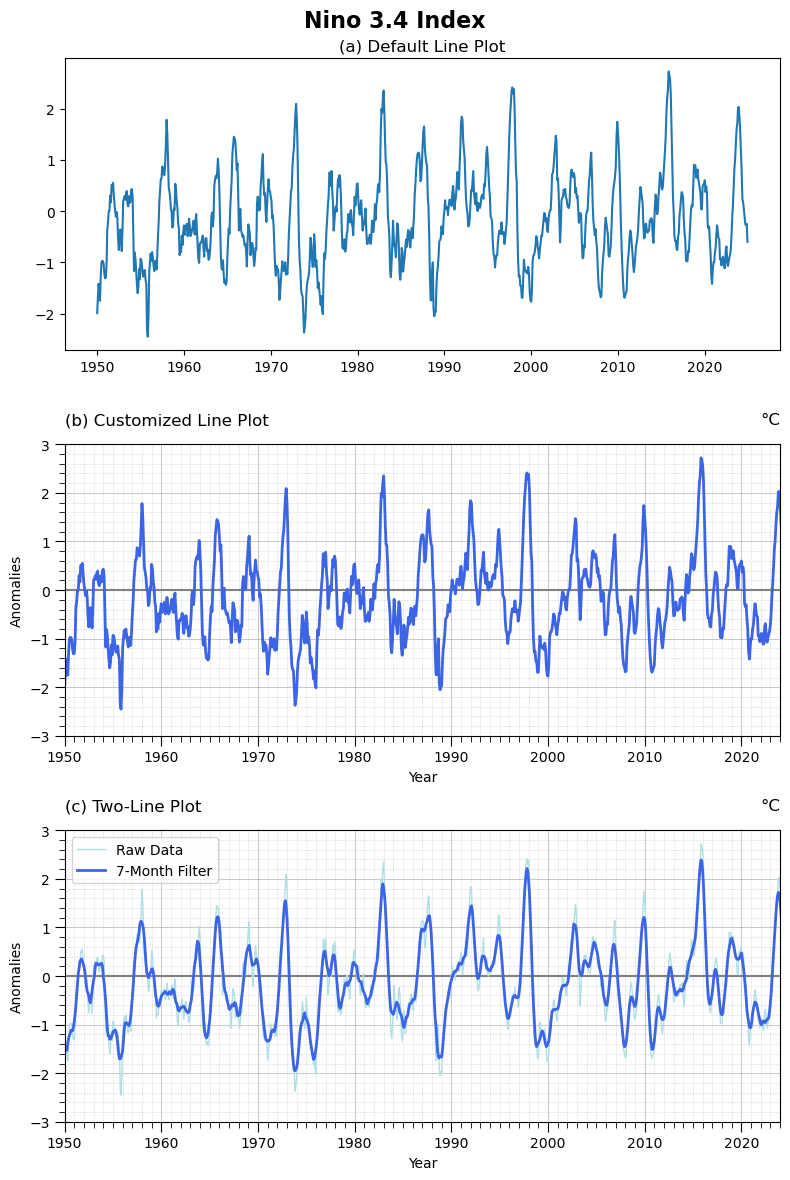

In [4]:
# --- FIGURE PLOT ---
# Layout setting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
col = cmaps.amwg  # Use the AMWG colormap


# --- Modify HERE ---
# Each panel plot
ip = 0
axes[ip].plot(dat.index, dat)
axes[ip].set_title("(a) Default Line Plot")

def setup_axis(ax, ystr, yend, ymin, ymax, y_major, y_minor):
    # Make grid go below the bars
    ax.set_axisbelow(True)

    # X-Axis
    ax.xaxis.set_major_locator(mdates.YearLocator(10))
    ax.xaxis.set_minor_locator(mdates.YearLocator(1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    ax.set_xlim(pd.to_datetime(f"{ystr}"), pd.to_datetime(f"{yend}"))

    # Y-Axis
    ax.set_ylim(ymin, ymax)
    ax.yaxis.set_minor_locator(MultipleLocator(y_minor))

    # Customized grid setting
    ax.tick_params(axis="both", which="major", length=7)
    ax.tick_params(axis="both", which="minor", length=4)
    ax.grid(visible=True, which="major", linestyle="-", linewidth=0.7, alpha=0.7)
    ax.grid(visible=True, which="minor", linestyle="--", linewidth=0.4, alpha=0.5)

ip = 1
axes[ip].axhline(0, color="gray", linestyle="-")
axes[ip].plot(dat.index, dat, label="Nino 3.4 index", color=col.colors[4-2], linewidth=2)

setup_axis(axes[ip], ystr, yend, -3., 3., 1, 0.2)
gvutil.set_titles_and_labels(axes[ip],
    maintitle="",
    lefttitle="(b) Customized Line Plot",
    righttitle="°C",
    ylabel="Anomalies",
    xlabel="Year",
    maintitlefontsize=14,  # Adjust main title font size
    lefttitlefontsize=12,  # Set left title font size
    righttitlefontsize=12,  # Set left title font size
    labelfontsize=10  # Set y-label font size
)

ip = 2
dat_7mo = dat.rolling(window=7, center=True, min_periods=7).mean()
axes[ip].axhline(0, color="gray", linestyle="-")
axes[ip].plot(dat.index, dat, label="Raw Data", color=col.colors[6-2], linewidth=1)
axes[ip].plot(dat_7mo.index, dat_7mo, label="7-Month Filter", color=col.colors[4-2], linewidth=2)

setup_axis(axes[ip], ystr, yend, -3., 3., 1, 0.2)
gvutil.set_titles_and_labels(axes[ip],
    maintitle="",
    lefttitle="(c) Two-Line Plot",
    righttitle="°C",
    ylabel="Anomalies",
    xlabel="Year",
    maintitlefontsize=14,  # Adjust main title font size
    lefttitlefontsize=12,  # Set left title font size
    righttitlefontsize=12,  # Set left title font size
    labelfontsize=10  # Set y-label font size
)
axes[ip].legend()

# Apply the overall figure title
fig.suptitle("Nino 3.4 Index", fontsize=16, fontweight="bold")

# --- OUTPUT ---
plt.tight_layout()
plt.savefig(fnFIG, dpi=300, bbox_inches="tight")
plt.show()
